In [26]:
import pandas as pd
import numpy as np
import folium
import random
import os
import math
import matplotlib.pyplot as plt

In [3]:
def get_sq(lat, lon, diff=0.0001, num=2):
    res_list = []
    for i in range(-num, num + 1):
        for j in range(-num, num + 1):
            res_list.append((lat + diff * i, lon + diff * j))

    return res_list

In [4]:
def geodetic_to_cartesian(latitude, longitude):
    # Earth radius in meters
    earth_radius = 6371000.0

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(latitude)
    lon_rad = math.radians(longitude)

    # Calculate Cartesian coordinates
    x = earth_radius * math.cos(lat_rad) * math.cos(lon_rad)
    y = earth_radius * math.cos(lat_rad) * math.sin(lon_rad)
    return x, y

In [5]:
def calculate_cartesian_distance(coords1, coords2):
    x1, y1 = coords1
    x2, y2 = coords2

    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    return distance

In [6]:
bus_stop = "data/csv/busstop.csv"
route_path = "data/csv/route_station.csv"

bstops = pd.read_csv(bus_stop)
route_station = pd.read_csv(route_path)

closet station


In [7]:
bstops["cartesian_coords"] = bstops.apply(
    lambda row: geodetic_to_cartesian(row["lat"], row["lon"]), axis=1
)

user_cartesian_coords = geodetic_to_cartesian(13.766259787091231, 100.53515686552679)

bstops["distance_to_user"] = bstops["cartesian_coords"].apply(
    lambda coords: calculate_cartesian_distance(user_cartesian_coords, coords)
)

closest_bus_stop = bstops.loc[bstops["distance_to_user"].idxmin()]

### GPS log


In [28]:
# csv_path = "data/csv/2023-10-03.csv"

# column_names = ["vid", "route_id", "ts", "lat", "lon", "speed"]
# busdf = pd.read_csv(csv_path, names=column_names)

df_routes_data = pd.read_csv("process-time.csv")
df_routes_data["ts1"] = pd.to_datetime(df_routes_data["ts1"])

In [14]:
busdf = busdf[busdf["route_id"].isin(route_station["route_id"])]
busdf

,vid,route_id,ts,lat,lon,speed
967652,16-4422 1,1-44,2023-10-02 23:58:49,13.703676,101.693628,0
967653,16-4422 1,1-44,2023-10-03 00:02:49,13.703676,101.693628,0
967654,16-4422 1,1-44,2023-10-03 00:03:49,13.703676,101.693628,0
967655,16-4422 1,1-44,2023-10-03 00:03:49,13.703676,101.693628,0
967656,16-4422 1,1-44,2023-10-03 00:03:49,13.703676,101.693628,0
...,...,...,...,...,...,...
7675925,16-1201 1,4-70E,2023-10-03 19:18:11,13.579091,100.796428,32
7675926,16-1201 1,4-70E,2023-10-03 19:19:11,13.580143,100.798081,0
7675927,16-1201 1,4-70E,2023-10-03 19:20:12,13.580073,100.798365,0
7675928,16-1201 1,4-70E,2023-10-03 19:21:12,13.580073,100.798365,0


Count the number of buses


In [15]:
len(busdf["vid"].unique())

617

Count the number of buses


In [31]:
busdf["route_id"].unique()

array(['1-44', '1-6', '1-27', '2-23', '2-16', '1-15', '2-8', '1-24E',
       '1-1', '1-18E', '4-25', '4-51', '3-16E', '4-7E', '4-22E', '4-24E',
       '4-14', '4-18', '1-36', '1-38', '1-14E', '1-19', 'A1', '1-8', 'A2',
       '1-22E', '3-5', '3-17E', '3-18', '3-22E', '2-36', '4-48', '4-70E'],
      dtype=object)

Count number of busses per route


In [29]:
bus_in_route = df_routes_data.groupby("route_id")[["vid"]].nunique()
bus_in_route

,vid
route_id,
1-14E,12
1-15,10
1-19,39
1-22E,14
1-24E,18
1-27,1
1-36,27
1-38,51
1-6,10


In [33]:
bus_138 = df_routes_data[df_routes_data['route_id'] == '1-38']
bus_138

,ts1,lat,lon,speed,direction,sid1,seq,vid,route_id,sid2,ts2,mins,hrs,day_of_week
2773,2023-10-03 22:36:55,13.749500,100.546860,31,go,2909,18,16-1908 1,1-38,2908,2023-10-03 22:37:25,0.500000,22,Tuesday
2774,2023-10-03 17:57:49,13.808333,100.649610,4,go,3240,4,16-1894 1,1-38,5325,2023-10-03 18:01:34,3.750000,17,Tuesday
2775,2023-10-03 17:57:49,13.808333,100.649610,4,go,3240,4,16-1894 1,1-38,5325,2023-10-03 18:01:34,3.750000,17,Tuesday
2776,2023-10-03 08:38:56,13.768305,100.650917,20,back,1643,18,16-2115 1,1-38,1644,2023-10-03 08:39:41,0.750000,8,Tuesday
2777,2023-10-03 08:38:56,13.768305,100.650917,20,back,1643,18,16-2115 1,1-38,1644,2023-10-03 08:39:41,0.750000,8,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218628,2024-02-05 18:59:17,13.742360,100.601500,18,go,4083,15,16-1894 1,1-38,4562,2024-02-05 19:17:48,18.516667,18,Monday
218925,2024-02-05 06:41:36,13.808138,100.649417,0,go,3240,4,11-9290 1,1-38,5325,2024-02-05 06:43:06,1.500000,6,Monday
218926,2024-02-05 06:41:36,13.808138,100.649417,0,go,3240,4,11-9290 1,1-38,5325,2024-02-05 06:43:06,1.500000,6,Monday
218927,2024-02-05 06:41:36,13.808138,100.649417,0,go,3240,4,11-9290 1,1-38,5325,2024-02-05 06:43:06,1.500000,6,Monday


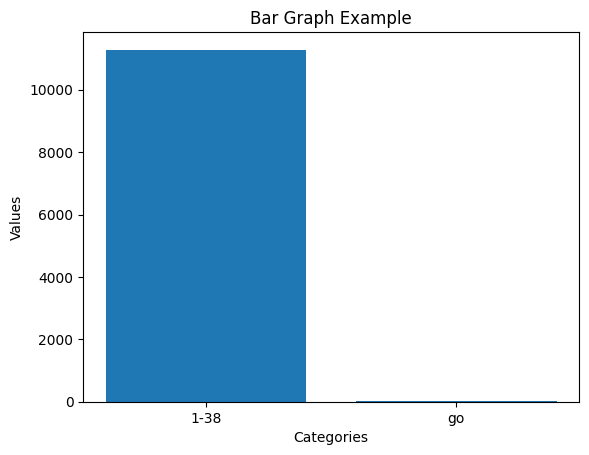

In [41]:

# Sample data
categories = ['1-38', 'go']
values = [len(bus_138['vid']), 20]

# Plotting the bar graph
plt.bar(categories, values)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph Example')

# Display the plot
plt.show()


Count transactions per route per bus


In [ ]:
busdf.groupby(["route_id", "vid"])[["ts"]].count()

ts
route_id vid            
1-1      16-4737 1    73
         16-4739 1    70
         16-4742 1    71
         16-4748 1    71
         16-4749 1    77
...                  ...
A2       16-2423 1  1011
         16-2432 1  2019
         16-2441 1  2678
         16-2448 1  1260
         16-2518 1  1655

[617 rows x 1 columns]

In [ ]:
busdf.groupby(["route_id", "vid"])[["ts"]].count().sort_values("ts", ascending=False)

ts
route_id vid            
1-6      16-3702 1  5099
1-24E    16-4276 1  4602
4-51     16-4493 1  4175
1-24E    16-4282 1  4149
2-16     16-3688 1  4069
...                  ...
         16-3689 1    47
4-70E    16-1202 1    38
2-16     16-2909 1    19
4-14     13-0951 1    16
A1       16-2063 1    13

[617 rows x 1 columns]

In [ ]:
bstops.set_index("stopid", inplace=True)

bstops

,name_t,name_e,lat,lon,cartesian_coords,distance_to_user
stopid,,,,,,
321,ARL พญาไท,ARL Phaya Thai,13.756641,100.534981,"(-1131432.6807954235, 6083932.389178362)",255.130170
324,ARL มักกะสัน,ARL Makkasan,13.750389,100.561817,"(-1134312.4349805086, 6083564.267107731)",2909.841138
363,วังสราญรมย์,Saranrom Park,13.747348,100.495689,"(-1127304.9192123155, 6084948.402256774)",4292.010326
364,วังบูรพา,Wangburapa,13.745495,100.502705,"(-1128059.0468199532, 6084858.448930644)",3547.675363
365,วัดช่องลม,Wat Chong Lom,13.702777,100.545950,"(-1132857.586403129, 6085113.191260913)",2041.563002
...,...,...,...,...,...,...
13588,หน้าธนาคารไทยพาณิชย์,Siam Commercial Bank,13.582699,100.797057,"(-1160105.4373984197, 6083183.42364797)",28704.863865
13615,สเตเดี่ยม วัน,Stadium One,13.746043,100.524735,"(-1130395.842349913, 6084410.038413948)",1246.125522
13616,ลานจอดรถ Cu Sport,CU Sport,13.744519,100.524483,"(-1130376.4235242102, 6084454.604236577)",1288.238155


### Prepare bstop sq


In [ ]:
BSTOP_LOOKUP = {}

for index, row in bstops.iterrows():
    stopid = index
    lat = row["lat"]
    lon = row["lon"]

    sq_latlons = get_sq(lat, lon, num=2)

    # Convert the list of tuples to a string
    bstops.loc[index, "sqs"] = str(sq_latlons)

    for xlat, xlon in sq_latlons:
        xkey = str(round(xlat, 4)) + "-" + str(round(xlon, 4))
        BSTOP_LOOKUP[xkey] = stopid

C:\Users\66898\AppData\Local\Temp\ipykernel_14536\4246473701.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[(13.7564412159498, 100.53478089531899), (13.7564412159498, 100.53488089531899), (13.7564412159498, 100.534980895319), (13.7564412159498, 100.535080895319), (13.7564412159498, 100.535180895319), (13.7565412159498, 100.53478089531899), (13.7565412159498, 100.53488089531899), (13.7565412159498, 100.534980895319), (13.7565412159498, 100.535080895319), (13.7565412159498, 100.535180895319), (13.7566412159498, 100.53478089531899), (13.7566412159498, 100.53488089531899), (13.7566412159498, 100.534980895319), (13.7566412159498, 100.535080895319), (13.7566412159498, 100.535180895319), (13.7567412159498, 100.53478089531899), (13.7567412159498, 100.53488089531899), (13.7567412159498, 100.534980895319), (13.7567412159498, 100.535080895319), (13.7567412159498, 100.535180895319), (13.7568412159498, 100.53478089531899

### Visualization


In [ ]:
df = busdf[busdf["route_id"] == "1-24E"]

In [ ]:
route = route_station[route_station["route_id"] == "1-24E"]

In [ ]:
bus_path = "data/csv/route_polyline.csv"
bus_route = pd.read_csv(bus_path)

In [ ]:
f = folium.Figure(width=800, height=400)
m = folium.Map(
    width="100%",
    height="100%",
    tiles="cartodbpositron",
    location=(13.771005, 100.621933),
    zoom_start=13,
).add_to(f)

rinfo1 = bus_route[
    (bus_route["route_id"] == "1-24E") & (bus_route["direction"] == "go")
].iloc[0]
rpath1 = eval(rinfo1["polyline"])
folium.PolyLine(rpath1, color="red", weight=5, opacity=0.5).add_to(m)

for idx, row in route.iterrows():
    lat = row["lat"]
    lon = row["lon"]
    sid = row["sid"]
    sq_latlons = get_sq(lat, lon, num=2)

    folium.Marker(
        location=(lat, lon),
        tooltip=sid,
        radius=2,
    ).add_to(m)

    # for lat, lon in sq_latlons.iterrows():
    #     lat = row["lat"]
    #     lon = row["lon"]
    #     folium.Marker(
    #         location=(lat, lon),
    #         radius=2,
    #     ).add_to(m)


for idx, row in df.iterrows():
    lat = row["lat"]
    lon = row["lon"]

    folium.Circle(
        location=(lat, lon),
        radius=2,
    ).add_to(m)

m